In [3]:
%pip install graphviz -q

Note: you may need to restart the kernel to use updated packages.


ToolArguments(display_id='f72bb39d-e045-4a8e-b0bf-2a764f8c2dd9', id='call_VtdlyED4Hak06B2qje1AoRmP', name='visualize_knowledge_graph', arguments='{\n  "kg": {\n    "nodes": [\n      {\n        "id": 1,\n        "label": "Coffee Beans",\n        "color": "brown"\n      },\n      {\n        "id": 2,\n        "label": "Grinder",\n        "color": "grey"\n      },\n      {\n        "id": 3,\n        "label": "Ground Coffee",\n        "color": "brown"\n      },\n      {\n        "id": 4,\n        "label": "Water",\n        "color": "blue"\n      },\n      {\n        "id": 5,\n        "label": "Heating",\n        "color": "orange"\n      },\n      {\n        "id": 6,\n        "label": "Hot Water",\n        "color": "blue"\n      },\n      {\n        "id": 7,\n        "label": "Coffee Maker",\n        "color": "black"\n      },\n      {\n        "id": 8,\n        "label": "Brewing",\n        "color": "black"\n      },\n      {\n        "id": 9,\n        "label": "Coffee",\n        "color": "brown"\n      },\n      {\n        "id": 10,\n        "label": "Cup",\n        "color": "white"\n      }\n    ],\n    "edges": [\n      {\n        "source": 1,\n        "target": 2,\n        "label": "is ground by"\n      },\n      {\n        "source": 2,\n        "target": 3,\n        "label": "produces"\n      },\n      {\n        "source": 4,\n        "target": 5,\n        "label": "is heated by"\n      },\n      {\n        "source": 5,\n        "target": 6,\n        "label": "produces"\n      },\n      {\n        "source": 3,\n        "target": 7,\n        "label": "is placed in"\n      },\n      {\n        "source": 6,\n        "target": 7,\n        "label": "is poured into"\n      },\n      {\n        "source": 7,\n        "target": 8,\n        "label": "performs"\n      },\n      {\n        "source": 8,\n        "target": 9,\n        "label": "results in"\n      },\n      {\n        "source": 9,\n        "target": 10,\n        "label": "is served in"\n      }\n    ]\n  },\n  "comment": "Coffee Brewing Process"\n}', verbage='Ran', finished=True)

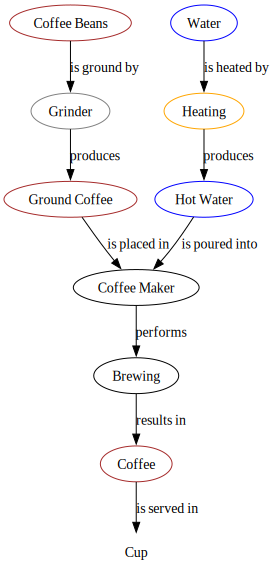

The process of brewing coffee involves the following steps, which are visually represented in this knowledge graph:

1. **Coffee Beans:** Start with whole coffee beans, which are the raw material for making coffee.
2. **Grinder:** The coffee beans are ground using a grinder. This process is important for the freshness and flavor of the coffee, as grinding increases the surface area and helps in better extraction of flavors.
3. **Ground Coffee:** The result of grinding the coffee beans is ground coffee, which is ready for brewing.
4. **Water:** Begin with clean water, which is essential for the taste of the coffee.
5. **Heating:** The water is then heated to the right temperature, which is typically between 195°F and 205°F (90°C to 96°C).
6. **Hot Water:** The heated water becomes hot water, ready to be used in brewing.
7. **Coffee Maker:** The ground coffee is placed in the coffee maker's filter basket or other brewing device, and the hot water is poured over it.
8. **Brewing:** The coffee maker then brews the coffee, which involves the hot water passing through the ground coffee to extract its flavors and compounds.
9. **Coffee:** The result of the brewing process is coffee, which is the beverage we enjoy.
10. **Cup:** The brewed coffee is served in a cup.

This is a simplified overview of the process, and variations can occur depending on the brewing method used (e.g., drip, espresso, French press, etc.). Each step is crucial to achieving the desired flavor and strength of the coffee.

In [4]:
from graphviz import Digraph
from pydantic import BaseModel, Field
from typing import List
from chatlab import Chat, system


class Node(BaseModel):
    id: int
    label: str
    color: str


class Edge(BaseModel):
    source: int
    target: int
    label: str
    color: str = "black"


class KnowledgeGraph(BaseModel):
    nodes: List[Node] = Field(..., default_factory=list)
    edges: List[Edge] = Field(..., default_factory=list)


def visualize_knowledge_graph(kg: KnowledgeGraph, comment: str = "Knowledge Graph"):
    """Visualizes a knowledge graph using graphviz."""
    dot = Digraph(comment=comment)

    for node in kg.nodes:
        dot.node(str(node.id), node.label, color=node.color)

    for edge in kg.edges:
        dot.edge(str(edge.source), str(edge.target), label=edge.label, color=edge.color)

    display(dot)

    return "<<Graphic displayed inline for the user to see>>"


chat = Chat(
    system(
        "You are running inside a jupyter notebook. Your responses appear as markdown in the notebook. Functions you run can produce side effects."
    ),
    model="gpt-4-1106-preview",
    chat_functions=[visualize_knowledge_graph],
)

await chat("Visually teach me about the process of brewing coffee.", temperature=0.9)

ToolArguments(display_id='c05a5fd0-c997-4ae3-af54-4bb009ec47ce', id='call_ElQGcyNI8iwxB0vd8qu8eQ5D', name='visualize_knowledge_graph', arguments='{"kg": {"nodes": [{"id": 1, "label": "Cats", "color": "grey"}, {"id": 2, "label": "Feline", "color": "orange"}, {"id": 3, "label": "Whiskers", "color": "black"}, {"id": 4, "label": "Purring", "color": "purple"}, {"id": 5, "label": "Hunting", "color": "green"}, {"id": 6, "label": "Napping", "color": "yellow"}], "edges": [{"source": 1, "target": 2, "label": "is a"}, {"source": 1, "target": 3, "label": "has"}, {"source": 1, "target": 4, "label": "capable of"}, {"source": 1, "target": 5, "label": "engages in"}, {"source": 1, "target": 6, "label": "enjoys"}]}, "comment": "Knowledge Graph about Cats"}', verbage='Ran', finished=True)

ToolArguments(display_id='5a499b38-5089-40e1-b614-8a04380f04aa', id='call_csjm60iTTQH7R8TV0uE3KLF7', name='visualize_knowledge_graph', arguments='{"kg": {"nodes": [{"id": 1, "label": "Dogs", "color": "brown"}, {"id": 2, "label": "Canine", "color": "orange"}, {"id": 3, "label": "Barking", "color": "black"}, {"id": 4, "label": "Tail Wagging", "color": "purple"}, {"id": 5, "label": "Fetching", "color": "green"}, {"id": 6, "label": "Loyalty", "color": "yellow"}], "edges": [{"source": 1, "target": 2, "label": "is a"}, {"source": 1, "target": 3, "label": "capable of"}, {"source": 1, "target": 4, "label": "shows"}, {"source": 1, "target": 5, "label": "enjoys"}, {"source": 1, "target": 6, "label": "known for"}]}, "comment": "Knowledge Graph about Dogs"}', verbage='Ran', finished=True)

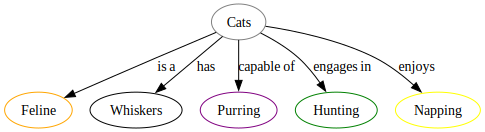

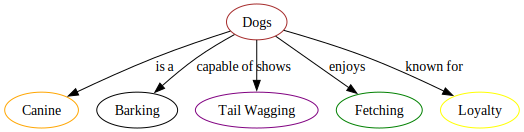

Here are two knowledge graphs, one about cats and one about dogs:

### Knowledge Graph about Cats
- **Cats:** Central to the graph, representing the domesticated feline.
- **Feline:** Cats are a type of feline, a family that includes other large and small wild cats.
- **Whiskers:** Cats have whiskers, which are sensitive tactile hairs that help them navigate and sense their environment.
- **Purring:** Cats are capable of purring, a behavior that can indicate contentment or comfort.
- **Hunting:** Cats engage in hunting, using their natural instincts to catch prey, even when they are not hungry.
- **Napping:** Cats enjoy napping and are known for sleeping for long periods throughout the day.

### Knowledge Graph about Dogs
- **Dogs:** Central to the graph, representing the domesticated canine.
- **Canine:** Dogs are a type of canine, a family that includes wolves, foxes, and other related species.
- **Barking:** Dogs are capable of barking, which they use for communication, alerting, and sometimes just for attention.
- **Tail Wagging:** Dogs show tail wagging as a sign of various emotions, including excitement, happiness, and nervousness.
- **Fetching:** Dogs enjoy fetching objects, which is a playful activity and can also be part of their training.
- **Loyalty:** Dogs are known for their loyalty to their human companions, often forming strong bonds.

These graphs highlight some of the key characteristics and behaviors associated with cats and dogs.

In [5]:
await chat("Ok now make two knowledge graphs at the same time. One about cats and one about dogs.")